In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

KeyboardInterrupt: 

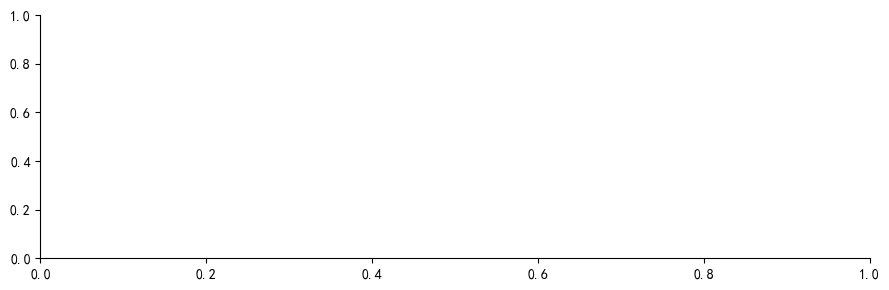

In [4]:
import seaborn as sns
for i in train.columns:
    if train[i].dtype!='object' and i not in ('id','y'):
        ageFacet=sns.FacetGrid(train,hue='y',aspect=3)
        #作图，选择图形类型
        ageFacet.map(sns.kdeplot,i,shade=True)
        #其他信息：坐标轴范围、标签等
        ageFacet.add_legend()
        print(i,train[i].skew())

In [3]:
n=len(train)
df=pd.concat([train,test], ignore_index=True)
df['default']=df['default'].map({'no':0, 'yes':1})
df['housing']=df['housing'].map({'no':0, 'yes':1})
df['loan']=df['loan'].map({'no':0, 'yes':1})
df['month']=df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df['campaign']=np.log(df['campaign'])
df['previous']=np.log1p(df['previous'])
df['duration']=np.log(df['duration'])
df['balance']=pd.cut(df['balance'],bins=[-10000,0,1000,5000,20000,100000],labels=['Loss', 'Low', 'Medium', 'High', 'Very High'])
df['pdays'].replace(-1,1000)
df.drop(['id'],axis=1,inplace=True)
df=pd.get_dummies(df)

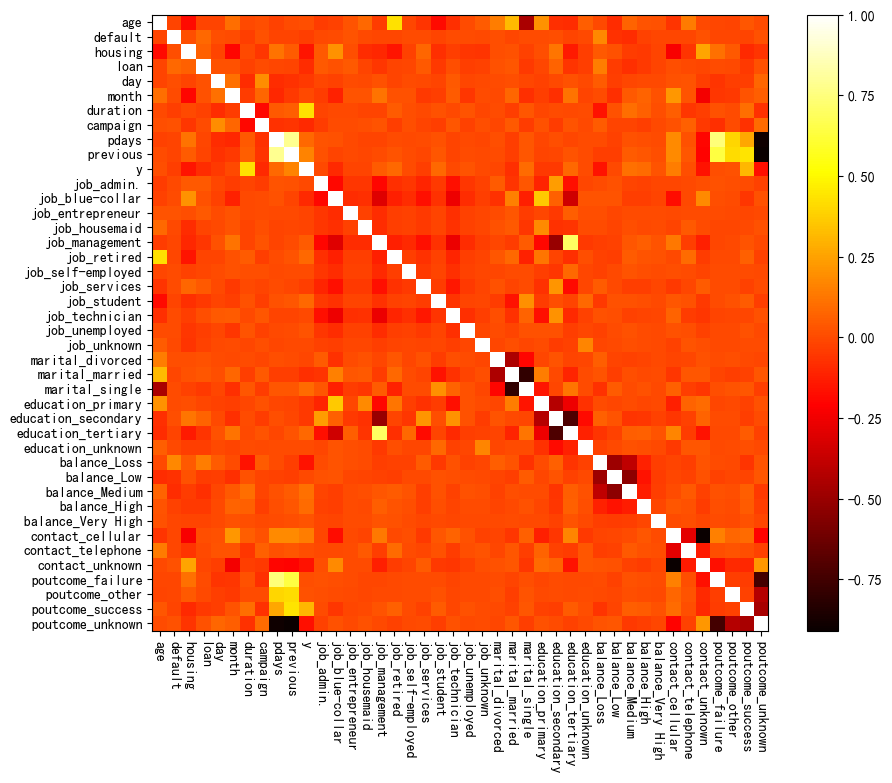

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(df.corr(),cmap='hot')
plt.xticks(range(len(df.columns)), df.columns, rotation=-90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [8]:
from autogluon.tabular import TabularDataset, TabularPredictor

predictor = TabularPredictor(label='y').fit(
    train_data=train,
    time_limit=7200,
    presets='best',
    num_bag_folds=5,
    num_bag_sets=1,
    num_stack_levels=1,
)

# 3. 查看模型排行榜，可以看到AutoGluon训练的所有模型及其性能
# 排名第一的通常是名为 "WeightedEnsemble_L3" 的加权集成模型，它就是最终的堆叠元模型
leaderboard = predictor.leaderboard()

# 4. 用集成好的模型进行预测
predictions = predictor.predict(test)
ans_df=pd.DataFrame({'id':test['id'],'BeatsPerMinute':predictions})
ans_df.to_csv('autogluon_submission.csv',index=False)

No path specified. Models will be saved in: "AutogluonModels\ag-20250916_021740"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
CPU Count:          20
Memory Avail:       51.94 GB / 63.86 GB (81.3%)
Disk Space Avail:   87.06 GB / 464.50 GB (18.7%)
Presets specified: ['best']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify t

[1000]	valid_set's binary_error: 0.0660747
[2000]	valid_set's binary_error: 0.0659172
[1000]	valid_set's binary_error: 0.0659477
[2000]	valid_set's binary_error: 0.0653927
[3000]	valid_set's binary_error: 0.0654152
[4000]	valid_set's binary_error: 0.0653702
[1000]	valid_set's binary_error: 0.0654602
[2000]	valid_set's binary_error: 0.0651227
[3000]	valid_set's binary_error: 0.0649127
[4000]	valid_set's binary_error: 0.0648152
[1000]	valid_set's binary_error: 0.0642527


	0.9349	 = Validation score   (accuracy)
	63.5s	 = Training   runtime
	5.96s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1128.08s of the 1727.76s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)


[1000]	valid_set's binary_error: 0.0638697
[2000]	valid_set's binary_error: 0.0636072
[1000]	valid_set's binary_error: 0.0634352
[1000]	valid_set's binary_error: 0.0632027
[2000]	valid_set's binary_error: 0.0630527
[1000]	valid_set's binary_error: 0.0624077
[2000]	valid_set's binary_error: 0.0617927
[3000]	valid_set's binary_error: 0.0615527
[4000]	valid_set's binary_error: 0.0615527
[1000]	valid_set's binary_error: 0.0633002
[2000]	valid_set's binary_error: 0.0631502


	0.9373	 = Validation score   (accuracy)
	54.96s	 = Training   runtime
	4.64s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 1067.58s of the 1667.26s of remaining time.
	0.9325	 = Validation score   (accuracy)
	36.11s	 = Training   runtime
	13.3s	 = Validation runtime
Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 1017.61s of the 1617.28s of remaining time.
	0.9329	 = Validation score   (accuracy)
	41.0s	 = Training   runtime
	15.22s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 960.85s of the 1560.52s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	Ran out of time, early stopping on iteration 1035.
	Ran out of time, early stopping on iteration 1124.
	Ran out of time, early stopping on iteration 1087.
	Ran out of time, early stopping on iteration 904.
	Ran out of time, early stopping on iteration 15

[1000]	valid_set's binary_error: 0.0660733
[2000]	valid_set's binary_error: 0.0658533
[1000]	valid_set's binary_error: 0.0650467
[1000]	valid_set's binary_error: 0.06556
[2000]	valid_set's binary_error: 0.0648
[3000]	valid_set's binary_error: 0.0646933
[4000]	valid_set's binary_error: 0.06476
[1000]	valid_set's binary_error: 0.0649267
[2000]	valid_set's binary_error: 0.0645733
[3000]	valid_set's binary_error: 0.06434
[4000]	valid_set's binary_error: 0.0642667
[5000]	valid_set's binary_error: 0.0639733
[6000]	valid_set's binary_error: 0.06412
[1000]	valid_set's binary_error: 0.0658933
[2000]	valid_set's binary_error: 0.0652533
[3000]	valid_set's binary_error: 0.0653067


	0.9352	 = Validation score   (accuracy)
	317.58s	 = Training   runtime
	55.33s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 3179.43s of the 4957.72s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)


[1000]	valid_set's binary_error: 0.0637933
[2000]	valid_set's binary_error: 0.06322
[1000]	valid_set's binary_error: 0.0627933
[2000]	valid_set's binary_error: 0.06252
[1000]	valid_set's binary_error: 0.0629467
[2000]	valid_set's binary_error: 0.0624933
[3000]	valid_set's binary_error: 0.0622467
[1000]	valid_set's binary_error: 0.0622067
[2000]	valid_set's binary_error: 0.0618533
[1000]	valid_set's binary_error: 0.0636867
[2000]	valid_set's binary_error: 0.06278
[3000]	valid_set's binary_error: 0.06248


	0.9377	 = Validation score   (accuracy)
	73.79s	 = Training   runtime
	5.7s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 3098.82s of the 4877.11s of remaining time.
	0.9326	 = Validation score   (accuracy)
	40.37s	 = Training   runtime
	14.36s	 = Validation runtime
Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 3043.54s of the 4821.83s of remaining time.
	0.9328	 = Validation score   (accuracy)
	46.22s	 = Training   runtime
	16.72s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 2980.06s of the 4758.34s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	Ran out of time, early stopping on iteration 1176.
	Ran out of time, early stopping on iteration 2472.
	Ran out of time, early stopping on iteration 2531.
	Ran out of time, early stopping on iteration 3388.
	Ran out of time, early stopping on iteration

In [4]:
x=df.drop('y',axis=1)
columns=x.columns
y=df['y']
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
x=PCA().fit_transform(x)
tx,ty=x[:n],y[:n]
pre=x[n:]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tx,ty,test_size=0.2,shuffle=True,stratify=ty)

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(class_weight='balanced')
lg.fit(x_train,y_train)
print('auc :')
print(roc_auc_score(y_train, lg.predict_proba(x_train)[:, 1]))
print(roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1]))

auc :
0.9366527478353301
0.9375233445575774


In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold()
for train_i,test_i in kfold.split(tx,ty):
    lg=LogisticRegression(class_weight='balanced')
    x_train_fold=tx[train_i]
    y_train_fold=ty[train_i]
    x_test_fold=tx[test_i]
    y_test_fold=ty[test_i]

    lg.fit(x_train_fold,y_train_fold)
    print(roc_auc_score(y_test_fold,lg.predict_proba(x_test_fold)[:,1]))

0.936316023028121
0.9380093134434229
0.9361383273482162
0.9353415859940515
0.9382216529352534


In [ ]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = [
    LogisticRegression(class_weight='balanced'),
    LGBMClassifier(class_weight='balanced'),
    XGBClassifier(scale_pos_weight=7.288, tree_method='gpu_hist'),
    CatBoostClassifier(auto_class_weights='Balanced', verbose=False, task_type = 'GPU'),
]

for m in models:
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print('auc :')
    print(roc_auc_score(y_train, m.predict_proba(x_train)[:, 1]))
    print(roc_auc_score(y_test, m.predict_proba(x_test)[:, 1]))
    print()

LogisticRegression
auc :
0.937213360705605
0.9353931386241559

[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10455
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LGBMClassifier
auc :
0.9473436136550721
0.9421337830926523

XGBClassifier
auc :
0.9593331969783416
0.9440023005037317

CatBoostClassifier
auc :
0.9476505657627264
0.9435654927684274



In [ ]:
# ans=models[-3].predict(pre)
# ans_df=pd.DataFrame({'id':test['id'],'y':ans})
# ans_df.to_csv('submission.csv',index=False)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [ ]:
import optuna
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def lgbm_search(trial):
    boosting_type = trial.suggest_categorical("boosting_type", ["gbdt", "goss"])
    n_estimators = trial.suggest_int("n_estimators", 200, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 5, 100, step=5)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1, log=True)
    min_child_samples = trial.suggest_int("min_child_samples", 5, 100)
    min_split_gain = trial.suggest_float("min_split_gain", 0.0, 1.0)
    min_child_weight = trial.suggest_float("min_child_weight", 1e-4, 0.01, log=True)
    reg_alpha = trial.suggest_float("reg_alpha", 1e-6, 0.1, log=True),
    reg_lambda = trial.suggest_float("reg_lambda", 1e-6, 0.1, log=True),
    sk = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state = 42)
    rf = LGBMClassifier(boosting_type=boosting_type,
                        n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        min_child_samples=min_child_samples,
                        min_child_weight=min_child_weight,
                        min_split_gain=min_split_gain,
                        reg_alpha=reg_alpha,
                        reg_lambda=reg_lambda,
                        class_weight='balanced',
                        verbose = -1)
    val = cross_val_score(rf, tx, ty, scoring='roc_auc', cv=sk).mean()
    return -val

lgbm_study = optuna.create_study(study_name='lgbm', direction="minimize",)
lgbm_study.optimize(lgbm_search, timeout=int(60 * 60))
lgbm_params = lgbm_study.best_params

[I 2025-08-17 12:36:38,183] A new study created in memory with name: lgbm
[I 2025-08-17 12:37:03,115] Trial 0 finished with value: -0.9362162334242905 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 300, 'max_depth': 80, 'learning_rate': 0.015473408612588809, 'min_child_samples': 21, 'min_split_gain': 0.7890298232167748, 'min_child_weight': 0.007246632514409796, 'reg_alpha': 0.0009369842803464263, 'reg_lambda': 0.0018792062189001966}. Best is trial 0 with value: -0.9362162334242905.
[I 2025-08-17 12:37:45,415] Trial 1 finished with value: -0.9449582916001988 and parameters: {'boosting_type': 'goss', 'n_estimators': 700, 'max_depth': 30, 'learning_rate': 0.01621295304046946, 'min_child_samples': 69, 'min_split_gain': 0.0011899319392534302, 'min_child_weight': 0.0001347325226352036, 'reg_alpha': 0.0008418962323118867, 'reg_lambda': 0.031564169211945874}. Best is trial 1 with value: -0.9449582916001988.
[I 2025-08-17 12:38:03,149] Trial 2 finished with value: -0.9394955403420866

In [ ]:
import optuna
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def xgb_search(trial):
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0, step=0.1)
    gamma = trial.suggest_float('gamma', 1, 10, step=0.5)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    max_depth = trial.suggest_int('max_depth', 5, 30, step=1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 15, step=1)
    n_estimators = trial.suggest_int('n_estimators', 200, 1000, step=100)
    subsample = trial.suggest_float('subsample', 0.6, 1.0, step=0.1)
    sk = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state = 42)
    xgb = XGBClassifier(objective = 'binary:logistic',
                        scale_pos_weight=7.288,
                        tree_method='gpu_hist',
                        colsample_bytree = colsample_bytree, 
                        gamma = gamma, 
                        learning_rate = learning_rate, 
                        max_depth = max_depth, 
                        min_child_weight = min_child_weight, 
                        n_estimators = n_estimators, 
                        subsample = subsample)
    val = cross_val_score(xgb, tx, ty, scoring='roc_auc', cv=sk).mean()
    return -val

xgb_study = optuna.create_study(study_name='xgb', direction="minimize",)
xgb_study.optimize(xgb_search, timeout=int(60 * 60))
xgb_params = xgb_study.best_params

[I 2025-08-17 14:46:47,190] A new study created in memory with name: xgb
[I 2025-08-17 14:48:23,883] Trial 0 finished with value: -0.9500020918223321 and parameters: {'colsample_bytree': 1.0, 'gamma': 8.0, 'learning_rate': 0.05572308506342327, 'max_depth': 26, 'min_child_weight': 13, 'n_estimators': 600, 'subsample': 0.7}. Best is trial 0 with value: -0.9500020918223321.
[I 2025-08-17 14:50:25,999] Trial 1 finished with value: -0.950385107389101 and parameters: {'colsample_bytree': 0.6, 'gamma': 6.5, 'learning_rate': 0.04440336884964687, 'max_depth': 18, 'min_child_weight': 7, 'n_estimators': 900, 'subsample': 0.9}. Best is trial 1 with value: -0.950385107389101.
[I 2025-08-17 14:50:39,406] Trial 2 finished with value: -0.9380326016688599 and parameters: {'colsample_bytree': 0.8, 'gamma': 3.5, 'learning_rate': 0.020788303653178207, 'max_depth': 5, 'min_child_weight': 15, 'n_estimators': 300, 'subsample': 1.0}. Best is trial 1 with value: -0.950385107389101.
[I 2025-08-17 14:52:13,785] 

In [ ]:
import optuna
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def cat_search(trial):
    iterations = trial.suggest_int('iterations', 200, 1000, step=100)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    depth = trial.suggest_int('depth', 5, 16, step=1)
    random_strength = trial.suggest_float('random_strength', 0.5, 1, step=0.1)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0.5, 1, step=0.1)
    border_count = trial.suggest_int('border_count', 1, 100, step=10)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 10, step=1)
    sk = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state = 42)
    cat = CatBoostClassifier(loss_function = 'Logloss',
                                iterations = iterations,
                                learning_rate = learning_rate,
                                depth = depth,
                                random_strength = random_strength,
                                bagging_temperature = bagging_temperature,
                                border_count = border_count,
                                l2_leaf_reg = l2_leaf_reg,
                                verbose = False, 
                                auto_class_weights='Balanced',
                                task_type = 'GPU')
    val = cross_val_score(cat, tx, ty, scoring='roc_auc', cv=sk).mean()
    return -val

cat_study = optuna.create_study(study_name='cat', direction="minimize",)
cat_study.optimize(cat_search, timeout=int(60 * 60))
cat_params = cat_study.best_params

[I 2025-08-17 13:40:36,432] A new study created in memory with name: cat
[I 2025-08-17 13:45:51,931] Trial 0 finished with value: -0.917894898381775 and parameters: {'iterations': 300, 'learning_rate': 0.031548097499887434, 'depth': 14, 'random_strength': 0.6, 'bagging_temperature': 1.0, 'border_count': 1, 'l2_leaf_reg': 6}. Best is trial 0 with value: -0.917894898381775.
[I 2025-08-17 13:46:26,767] Trial 1 finished with value: -0.936547870426363 and parameters: {'iterations': 200, 'learning_rate': 0.03634755401402679, 'depth': 6, 'random_strength': 1.0, 'bagging_temperature': 0.6, 'border_count': 21, 'l2_leaf_reg': 5}. Best is trial 1 with value: -0.936547870426363.
[I 2025-08-17 13:47:30,836] Trial 2 finished with value: -0.9457548371259928 and parameters: {'iterations': 600, 'learning_rate': 0.028014542271801487, 'depth': 8, 'random_strength': 0.5, 'bagging_temperature': 0.9, 'border_count': 81, 'l2_leaf_reg': 3}. Best is trial 2 with value: -0.9457548371259928.
[I 2025-08-17 14:46:

In [ ]:
lgbm_params={'boosting_type': 'goss',
 'n_estimators': 1000,
 'max_depth': 79,
 'learning_rate': 0.0565190929195049,
 'min_child_samples': 100,
 'min_split_gain': 0.3607593295030749,
 'min_child_weight': 0.0010094638785879322,
 'reg_alpha': 0.005710429255947321,
 'reg_lambda': 0.0015422793366963359}

xgb_params={'colsample_bytree': 0.7,
 'gamma': 8.5,
 'learning_rate': 0.0334509411570634,
 'max_depth': 13,
 'min_child_weight': 13,
 'n_estimators': 900,
 'subsample': 0.8}

cat_params={'iterations': 600,
 'learning_rate': 0.028014542271801487,
 'depth': 8,
 'random_strength': 0.5,
 'bagging_temperature': 0.9,
 'border_count': 81,
 'l2_leaf_reg': 3}

In [ ]:
def hill_climbing(x, y, x_test):
    # 初始化得分字典，用于存储每个模型的AUC得分
    scores = {}

    # 遍历x列标签（各模型）
    for col in x.columns:
        # 计算各模型的AUC指标
        scores[col] = roc_auc_score(y, x[col])

    # 根据AUC对模型进行排序，得分高的排在前面
    scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}

    # 根据AUC得分高低重新排列x和x_test的列顺序
    x = x[list(scores.keys())]
    x_test = x_test[list(scores.keys())]

    # 停止标志，控制爬山算法的终止条件
    STOP = False

    # 取出得分最高的模型作为初始最优模型
    current_best_ensemble = x.iloc[:, 0]
    current_best_test_preds = x_test.iloc[:, 0]

    # 除最优模型外的其他模型
    MODELS = x.iloc[:, 1:]

    # 权重空间，用于尝试不同的权重值
    weight_range = np.arange(-0.5, 0.51, 0.01)

    # 计算最优模型AUC得分的历史，用于观察算法进展
    history = [roc_auc_score(y, current_best_ensemble)]
    j = 0

    while not STOP:
        j += 1
        potential_new_best_cv_score = roc_auc_score(y, current_best_ensemble)
        k_best, wgt_best = None, None

        # 遍历每个模型以及权重空间，寻找最优的组合
        for k in MODELS:
            for wgt in weight_range:
                potential_ensemble = (1 - wgt) * current_best_ensemble + wgt * MODELS[k]
                cv_score = roc_auc_score(y, potential_ensemble)

                # 如果当前组合的AUC得分高于历史最优，更新最优组合
                if cv_score > potential_new_best_cv_score:
                    potential_new_best_cv_score = cv_score
                    k_best, wgt_best = k, wgt

        if k_best is not None:
            # 更新最优模型和测试集预测
            current_best_ensemble = (1 - wgt_best) * current_best_ensemble + wgt_best * MODELS[k_best]
            current_best_test_preds = (1 - wgt_best) * current_best_test_preds + wgt_best * x_test[k_best]

            # 从可用模型中移除已选模型
            MODELS.drop(k_best, axis=1, inplace=True)

            # 如果已经没有其他可用模型，则停止
            if MODELS.shape[1] == 0:
                STOP = True

            # 记录当前最优得分
            history.append(potential_new_best_cv_score)
        else:
            # 如果无法找到更好的组合，则停止
            STOP = True

    # 返回最终得到的集成模型的预测结果
    hill_ens_pred_1 = current_best_ensemble
    hill_ens_pred_2 = current_best_test_preds

    return [hill_ens_pred_1, hill_ens_pred_2]

In [ ]:
# 初始化交叉检验分数，初始化预测标签
ens_cv_scores, ens_preds = list(), list()
# 初始化hill交叉检验分数，初始化hill预测标签
hill_ens_cv_scores, hill_ens_preds =  list(), list()

# 重复k折交叉验证
sk = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state = 42)

# 遍历每折数据
for i, (train_idx, test_idx) in enumerate(sk.split(tx, ty)):
    
    # 划分训练测试集
    X_train, X_test = tx[train_idx], tx[test_idx]
    Y_train, Y_test = ty[train_idx], ty[test_idx]
    print('----------------------------------------------------------')
    # 训练LGBM模型
    LGBM_md = LGBMClassifier(verbose=-1,
                             class_weight='balanced',
                             **lgbm_params).fit(X_train, Y_train)
    
    # 得到测试集预测概率
    lgb_pred = LGBM_md.predict_proba(X_test)[:, 1]
    # 计算AUC分数
    lgb_score = roc_auc_score(Y_test, lgb_pred)
    # 得到测试集预测概率
    lgb_pred_test = LGBM_md.predict_proba(pre)[:, 1]
    #----------------------------------------------------------------------------
    # 训练XGB模型
    XGB_md = XGBClassifier(objective = 'binary:logistic',
                           scale_pos_weight=7.288,
                           tree_method='gpu_hist',
                           **xgb_params).fit(X_train, Y_train)
    # 得到验证集预测概率
    xgb_pred = XGB_md.predict_proba(X_test)[:, 1]
    # 计算AUC分数
    xgb_score = roc_auc_score(Y_test, xgb_pred)
    # 得到测试集预测概率
    xgb_pred_test = XGB_md.predict_proba(pre)[:, 1]
    #--------------------------------------------------------------------------
    # 训练CatBoost模型
    Cat_md = CatBoostClassifier(loss_function = 'Logloss',
                                verbose = False, 
                                task_type = 'GPU',
                                auto_class_weights='Balanced',
                                **cat_params).fit(X_train, Y_train)
    # 得到验证集预测概率
    cat_pred = Cat_md.predict_proba(X_test)[:, 1]
    # 计算AUC分数
    cat_score = roc_auc_score(Y_test, cat_pred)
    # 得到测试集预测概率
    cat_pred_test = Cat_md.predict_proba(pre)[:, 1]   
    #--------------------------------------------------------------------------
    # 简单组合模型
    # 各模型验证集预测概率均值
    ens_pred_1 = (lgb_pred + xgb_pred + cat_pred) / 3
    # 各模型测试集预测概率均值
    ens_pred_2 = (lgb_pred_test + xgb_pred_test + cat_pred_test) / 3
    # 计算AUC分数
    ens_score_fold = roc_auc_score(Y_test, ens_pred_1)
    # 记录组合模型验证集预测概率均值
    ens_cv_scores.append(ens_score_fold)
    # 记录组合模型测试集预测概率均值
    ens_preds.append(ens_pred_2)
    print('Fold', i, '==> Average Ensemble oof ROC-AUC score is ==>', ens_score_fold)
    #--------------------------------------------------------------------------
    # 加权组合模型
    x = pd.DataFrame({'LGBM': lgb_pred,
                      'XGB': xgb_pred,
                      'Cat': cat_pred})
    y = Y_test
        
    x_test = pd.DataFrame({'LGBM': lgb_pred_test,
                           'XGB': xgb_pred_test,
                           'Cat': cat_pred_test})
    
    hill_results = hill_climbing(x, y, x_test)
    
    hill_ens_score_fold = roc_auc_score(y, hill_results[0])
    hill_ens_cv_scores.append(hill_ens_score_fold)
    hill_ens_preds.append(hill_results[1])

    print('Fold', i, '==> Hill Climbing Ensemble oof ROC-AUC score is ==>', hill_ens_score_fold)

----------------------------------------------------------
Fold 0 ==> Average Ensemble oof ROC-AUC score is ==> 0.9504502510146011
Fold 0 ==> Hill Climbing Ensemble oof ROC-AUC score is ==> 0.9513806761464455
----------------------------------------------------------
Fold 1 ==> Average Ensemble oof ROC-AUC score is ==> 0.9496011160168294
Fold 1 ==> Hill Climbing Ensemble oof ROC-AUC score is ==> 0.9504230904866401
----------------------------------------------------------
Fold 2 ==> Average Ensemble oof ROC-AUC score is ==> 0.9499430653732533
Fold 2 ==> Hill Climbing Ensemble oof ROC-AUC score is ==> 0.9507929099432748
----------------------------------------------------------
Fold 3 ==> Average Ensemble oof ROC-AUC score is ==> 0.9506983839066809
Fold 3 ==> Hill Climbing Ensemble oof ROC-AUC score is ==> 0.9515804466450719
----------------------------------------------------------
Fold 4 ==> Average Ensemble oof ROC-AUC score is ==> 0.9502142716812467
Fold 4 ==> Hill Climbing Ensemble

In [ ]:
ens_preds_test = pd.DataFrame(ens_preds).apply(np.mean, axis = 0)
ans_df=pd.DataFrame({'id':test['id'],'y':ens_preds_test})
ans_df.to_csv('Avereage_Ensemble_Baseline_submission.csv',index=False)

ens_preds_test = pd.DataFrame(hill_ens_preds).apply(np.mean, axis = 0)
ans_df=pd.DataFrame({'id':test['id'],'y':ens_preds_test})
ans_df.to_csv('Hill_Ensemble_Baseline_submission.csv',index=False)

In [7]:
import gc
import torch.cuda
from pytabkit import TabM_D_Classifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
oof = np.zeros(len(train))
pred = np.zeros(len(test))

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for idx, (train_idx, test_idx) in enumerate(skf.split(tx,ty)):
    X_train, X_test = tx[train_idx], tx[test_idx]
    Y_train, Y_test = ty[train_idx], ty[test_idx]

    param_grid = {
        'device': 'cuda',
        'n_cv': 5,
        'n_threads': 1,
        'val_metric_name': 'cross_entropy',
        'train_metric_name': 'cross_entropy',
        'verbosity': 1,
        'arch_type': 'tabm-mini',
        'tabm_k': 32,
        'num_emb_type': 'pwl',
        'd_embedding': 12,
        'batch_size': 256,
        'lr': 1e-3,
        'n_epochs': 10,
        'dropout': 0.1,
        'd_block': 512,
        'n_blocks': 3,
        'allow_amp': True
    }

    model = TabM_D_Classifier(**param_grid)
    model.fit(X_train, Y_train, X_test, Y_test)
    oof[test_idx] = model.predict(X_test)
    pred += model.predict(pre)

    print(f'Fold {idx + 1}: {accuracy_score(Y_test, oof[test_idx])}')

    del model, X_train, X_test, Y_train, Y_test
    gc.collect()
    torch.cuda.empty_cache()
    
pred /= 5
print(f'CV AUC: {accuracy_score(train.y, oof)}')

ans_df=pd.DataFrame({'id':test['id'],'y':pred})
ans_df.to_csv('pytabkit_submission.csv',index=False)

Columns classified as continuous: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Columns classified as categorical: []
Setting seed: 1619032255
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 163.08it/s]


(val) -0.4005
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.83it/s]


(val) -0.3988
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 162.82it/s]


(val) -0.3947
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.54it/s]


(val) -0.3931
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 162.59it/s]


(val) -0.3923
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 162.71it/s]


(val) -0.3927



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 163.18it/s]


(val) -0.3909
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 162.55it/s]


(val) -0.3903
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 162.69it/s]


(val) -0.3899
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 162.79it/s]


(val) -0.3895
🌸 New best epoch! 🌸



Result:
{'val': -0.38947999477386475, 'epoch': 9}
Restoring best model
Setting seed: 188068357
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 162.79it/s]


(val) -0.4032
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.82it/s]


(val) -0.3964
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 162.64it/s]


(val) -0.3971



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.72it/s]


(val) -0.3938
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 162.79it/s]


(val) -0.3928
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 162.62it/s]


(val) -0.3921
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 162.45it/s]


(val) -0.3907
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 162.56it/s]


(val) -0.3917



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 162.82it/s]


(val) -0.3919



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 162.86it/s]


(val) -0.3895
🌸 New best epoch! 🌸



Result:
{'val': -0.389478474855423, 'epoch': 9}
Restoring best model
Setting seed: 1454842928
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 162.78it/s]


(val) -0.4029
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.80it/s]


(val) -0.3980
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 162.79it/s]


(val) -0.3966
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.78it/s]


(val) -0.3937
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 162.52it/s]


(val) -0.3933
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 162.52it/s]


(val) -0.3919
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 162.78it/s]


(val) -0.3926



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 163.02it/s]


(val) -0.3896
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 162.79it/s]


(val) -0.3905



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 162.72it/s]


(val) -0.3904



Result:
{'val': -0.38958704471588135, 'epoch': 7}
Restoring best model
Setting seed: 2010163202
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 162.83it/s]


(val) -0.4015
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.87it/s]


(val) -0.3968
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 162.74it/s]


(val) -0.3957
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.54it/s]


(val) -0.3953
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 162.75it/s]


(val) -0.3941
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 162.88it/s]


(val) -0.3918
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 162.66it/s]


(val) -0.3919



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 162.85it/s]


(val) -0.3924



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 162.80it/s]


(val) -0.3908
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 162.94it/s]


(val) -0.3903
🌸 New best epoch! 🌸



Result:
{'val': -0.3902876079082489, 'epoch': 9}
Restoring best model
Setting seed: 1413856380
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 162.90it/s]


(val) -0.4026
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.80it/s]


(val) -0.3972
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 162.80it/s]


(val) -0.3958
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.86it/s]


(val) -0.3929
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 162.77it/s]


(val) -0.3932



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 162.86it/s]


(val) -0.3920
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 162.81it/s]


(val) -0.3906
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 162.99it/s]


(val) -0.3896
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 163.28it/s]


(val) -0.3886
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 162.86it/s]


(val) -0.3884
🌸 New best epoch! 🌸



Result:
{'val': -0.38836848735809326, 'epoch': 9}
Restoring best model
Fold 1: 0.92986
Columns classified as continuous: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Columns classified as categorical: []
Setting seed: 1959853457
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 163.25it/s]


(val) -0.4025
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.89it/s]


(val) -0.3994
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 162.70it/s]


(val) -0.3940
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.93it/s]


(val) -0.3939
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 162.78it/s]


(val) -0.3945



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 162.85it/s]


(val) -0.3930
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 162.94it/s]


(val) -0.3918
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 163.17it/s]


(val) -0.3912
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 162.93it/s]


(val) -0.3902
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 162.86it/s]


(val) -0.3895
🌸 New best epoch! 🌸



Result:
{'val': -0.38949814438819885, 'epoch': 9}
Restoring best model
Setting seed: 380621309
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 162.69it/s]


(val) -0.4011
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.72it/s]


(val) -0.3973
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 162.71it/s]


(val) -0.3962
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.80it/s]


(val) -0.3957
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 162.69it/s]


(val) -0.3926
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 162.98it/s]


(val) -0.3922
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 162.71it/s]


(val) -0.3918
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 162.83it/s]


(val) -0.3908
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 162.95it/s]


(val) -0.3903
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 162.84it/s]


(val) -0.3905



Result:
{'val': -0.3903062641620636, 'epoch': 8}
Restoring best model
Setting seed: 635030305
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 163.02it/s]


(val) -0.4017
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.73it/s]


(val) -0.3993
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 162.87it/s]


(val) -0.3958
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.88it/s]


(val) -0.3947
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 163.05it/s]


(val) -0.3946
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 163.02it/s]


(val) -0.3922
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 162.78it/s]


(val) -0.3938



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 162.92it/s]


(val) -0.3927



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 162.93it/s]


(val) -0.3908
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 162.74it/s]


(val) -0.3917



Result:
{'val': -0.3907985985279083, 'epoch': 8}
Restoring best model
Setting seed: 1839230158
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 163.02it/s]


(val) -0.4027
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 162.86it/s]


(val) -0.3972
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 163.06it/s]


(val) -0.3959
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 162.86it/s]


(val) -0.3924
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 162.70it/s]


(val) -0.3926



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 163.15it/s]


(val) -0.3930



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 163.11it/s]


(val) -0.3914
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 163.10it/s]


(val) -0.3900
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 163.23it/s]


(val) -0.3901



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.36it/s]


(val) -0.3895
🌸 New best epoch! 🌸



Result:
{'val': -0.38953718543052673, 'epoch': 9}
Restoring best model
Setting seed: 1671904427
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.34it/s]


(val) -0.4023
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.26it/s]


(val) -0.3981
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.28it/s]


(val) -0.3943
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3948



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.07it/s]


(val) -0.3932
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3933



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.09it/s]


(val) -0.3912
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.18it/s]


(val) -0.3909
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.10it/s]


(val) -0.3917



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.11it/s]


(val) -0.3900
🌸 New best epoch! 🌸



Result:
{'val': -0.38998082280158997, 'epoch': 9}
Restoring best model
Fold 2: 0.92844
Columns classified as continuous: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Columns classified as categorical: []
Setting seed: 148068841
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.32it/s]


(val) -0.4017
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.09it/s]


(val) -0.3972
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.28it/s]


(val) -0.3954
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3939
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.17it/s]


(val) -0.3928
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.18it/s]


(val) -0.3924
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3925



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.16it/s]


(val) -0.3915
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.16it/s]


(val) -0.3898
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.25it/s]


(val) -0.3887
🌸 New best epoch! 🌸



Result:
{'val': -0.38871654868125916, 'epoch': 9}
Restoring best model
Setting seed: 1994894977
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.36it/s]


(val) -0.4006
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.37it/s]


(val) -0.3978
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.18it/s]


(val) -0.3961
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.15it/s]


(val) -0.3939
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.30it/s]


(val) -0.3928
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.28it/s]


(val) -0.3920
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.24it/s]


(val) -0.3922



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.23it/s]


(val) -0.3906
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3896
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3902



Result:
{'val': -0.38958683609962463, 'epoch': 8}
Restoring best model
Setting seed: 1043229789
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.35it/s]


(val) -0.4011
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.32it/s]


(val) -0.3978
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.34it/s]


(val) -0.3954
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.30it/s]


(val) -0.3938
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.37it/s]


(val) -0.3931
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.25it/s]


(val) -0.3922
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.28it/s]


(val) -0.3919
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.23it/s]


(val) -0.3908
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3905
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.33it/s]


(val) -0.3899
🌸 New best epoch! 🌸



Result:
{'val': -0.3898787200450897, 'epoch': 9}
Restoring best model
Setting seed: 73788306
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.31it/s]


(val) -0.4019
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.26it/s]


(val) -0.3983
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.17it/s]


(val) -0.3972
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.31it/s]


(val) -0.3950
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3933
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3927
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3923
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3929



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.29it/s]


(val) -0.3905
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.35it/s]


(val) -0.3903
🌸 New best epoch! 🌸



Result:
{'val': -0.39030101895332336, 'epoch': 9}
Restoring best model
Setting seed: 1349590987
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.34it/s]


(val) -0.4007
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.46it/s]


(val) -0.3978
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.18it/s]


(val) -0.3944
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.25it/s]


(val) -0.3937
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.28it/s]


(val) -0.3929
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.29it/s]


(val) -0.3943



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.29it/s]


(val) -0.3924
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.28it/s]


(val) -0.3932



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3915
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3902
🌸 New best epoch! 🌸



Result:
{'val': -0.3902248740196228, 'epoch': 9}
Restoring best model
Fold 3: 0.9289133333333334
Columns classified as continuous: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Columns classified as categorical: []
Setting seed: 1784854988
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.37it/s]


(val) -0.3987
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3989



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3957
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.21it/s]


(val) -0.3950
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.24it/s]


(val) -0.3932
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.30it/s]


(val) -0.3924
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.26it/s]


(val) -0.3920
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.13it/s]


(val) -0.3918
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.37it/s]


(val) -0.3911
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.15it/s]


(val) -0.3905
🌸 New best epoch! 🌸



Result:
{'val': -0.3904915750026703, 'epoch': 9}
Restoring best model
Setting seed: 1040036351
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.25it/s]


(val) -0.4002
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.23it/s]


(val) -0.3973
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.24it/s]


(val) -0.3960
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.32it/s]


(val) -0.3931
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.18it/s]


(val) -0.3928
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.15it/s]


(val) -0.3920
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3922



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3915
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3918



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3915



Result:
{'val': -0.39147040247917175, 'epoch': 7}
Restoring best model
Setting seed: 1599093262
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.26it/s]


(val) -0.4003
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3970
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3944
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.34it/s]


(val) -0.3930
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.36it/s]


(val) -0.3927
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.34it/s]


(val) -0.3915
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.34it/s]


(val) -0.3913
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.29it/s]


(val) -0.3911
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.27it/s]


(val) -0.3896
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3893
🌸 New best epoch! 🌸



Result:
{'val': -0.38933444023132324, 'epoch': 9}
Restoring best model
Setting seed: 367646637
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.32it/s]


(val) -0.4014
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.16it/s]


(val) -0.3974
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.14it/s]


(val) -0.3940
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.15it/s]


(val) -0.3926
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.27it/s]


(val) -0.3922
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.21it/s]


(val) -0.3928



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.21it/s]


(val) -0.3902
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.09it/s]


(val) -0.3893
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.07it/s]


(val) -0.3903



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.04it/s]


(val) -0.3889
🌸 New best epoch! 🌸



Result:
{'val': -0.3888869285583496, 'epoch': 9}
Restoring best model
Setting seed: 318413950
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.40it/s]


(val) -0.4008
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.41it/s]


(val) -0.3987
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3962
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.30it/s]


(val) -0.3943
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3923
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.29it/s]


(val) -0.3918
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3911
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3917



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.3904
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.25it/s]


(val) -0.3912



Result:
{'val': -0.390394389629364, 'epoch': 8}
Restoring best model
Fold 4: 0.9298533333333333
Columns classified as continuous: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Columns classified as categorical: []
Setting seed: 348079768
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.4023
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.09it/s]


(val) -0.3964
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.10it/s]


(val) -0.3946
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.13it/s]


(val) -0.3943
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 165.98it/s]


(val) -0.3928
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.08it/s]


(val) -0.3924
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3908
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.13it/s]


(val) -0.3911



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.22it/s]


(val) -0.3907
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3909



Result:
{'val': -0.39072585105895996, 'epoch': 8}
Restoring best model
Setting seed: 119412617
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.28it/s]


(val) -0.4006
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.20it/s]


(val) -0.3978
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.05it/s]


(val) -0.3957
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.15it/s]


(val) -0.3958



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.09it/s]


(val) -0.3929
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.14it/s]


(val) -0.3917
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.11it/s]


(val) -0.3912
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.11it/s]


(val) -0.3911
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.21it/s]


(val) -0.3913



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.25it/s]


(val) -0.3909
🌸 New best epoch! 🌸



Result:
{'val': -0.3908677399158478, 'epoch': 9}
Restoring best model
Setting seed: 1596380284
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.37it/s]


(val) -0.4009
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.21it/s]


(val) -0.3975
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.17it/s]


(val) -0.3967
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.28it/s]


(val) -0.3936
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.21it/s]


(val) -0.3920
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.27it/s]


(val) -0.3926



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.37it/s]


(val) -0.3926



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.24it/s]


(val) -0.3915
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.31it/s]


(val) -0.3906
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.33it/s]


(val) -0.3915



Result:
{'val': -0.3906388282775879, 'epoch': 8}
Restoring best model
Setting seed: 1099883239
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.21it/s]


(val) -0.4012
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 165.97it/s]


(val) -0.3984
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 165.93it/s]


(val) -0.3957
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.05it/s]


(val) -0.3943
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.09it/s]


(val) -0.3934
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.05it/s]


(val) -0.3923
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 166.12it/s]


(val) -0.3911
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 166.07it/s]


(val) -0.3916



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 166.10it/s]


(val) -0.3919



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 166.21it/s]


(val) -0.3900
🌸 New best epoch! 🌸



Result:
{'val': -0.38999223709106445, 'epoch': 9}
Restoring best model
Setting seed: 1996322445
Device:        CUDA
AMP:           True (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 2344/2344 [00:14<00:00, 166.19it/s]


(val) -0.4020
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 2344/2344 [00:14<00:00, 166.13it/s]


(val) -0.3982
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 2344/2344 [00:14<00:00, 166.12it/s]


(val) -0.3954
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 2344/2344 [00:14<00:00, 166.00it/s]


(val) -0.3950
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 2344/2344 [00:14<00:00, 166.03it/s]


(val) -0.3942
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 2344/2344 [00:14<00:00, 166.05it/s]


(val) -0.3929
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 2344/2344 [00:14<00:00, 165.95it/s]


(val) -0.3921
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 2344/2344 [00:14<00:00, 165.93it/s]


(val) -0.3922



Epoch 8: 100%|██████████| 2344/2344 [00:14<00:00, 165.92it/s]


(val) -0.3902
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 2344/2344 [00:14<00:00, 165.98it/s]


(val) -0.3908



Result:
{'val': -0.3901902139186859, 'epoch': 8}
Restoring best model
Fold 5: 0.92856
CV AUC: 0.9291253333333334
